In [16]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
import matplotlib.pyplot as plt

from qiskit import IBMQ, Aer

In [2]:
sim = Aer.get_backend('aer_simulator')
shots = 20000

In [3]:
## Create 7mod15 gate
N = 15
m = int(np.ceil(np.log2(N)))

U_qc = QuantumCircuit(m)
U_qc.x(range(m))
U_qc.swap(1, 2)
U_qc.swap(2, 3)
U_qc.swap(0, 3)

U = U_qc.to_gate()
U.name ='{}Mod{}'.format(7, N)

## Part 1

Step A

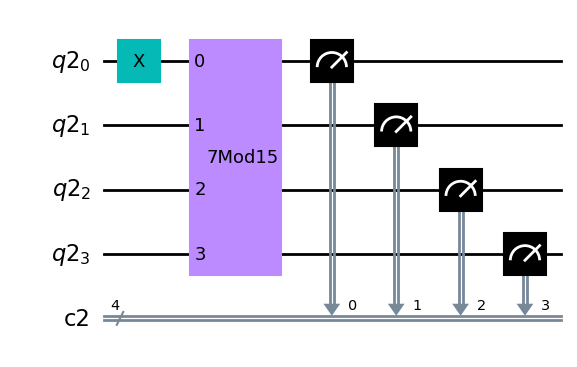

In [8]:
# Circuit for input state |1>

qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.x(qreg[0])
circ.append(U, qreg[:])
circ.measure(qreg[:], creg[:])
circ.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


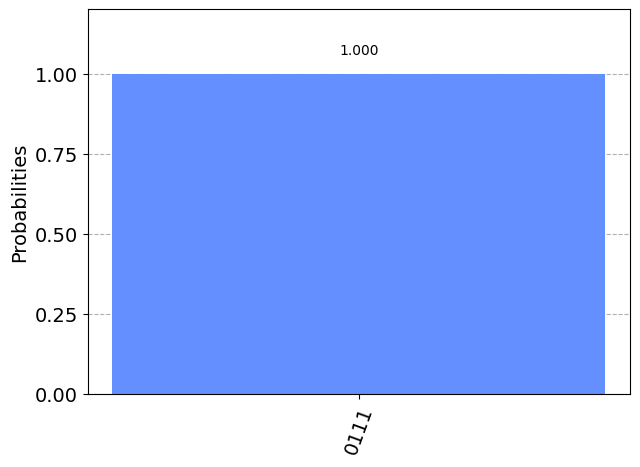

In [10]:
job = execute(circ, backend=sim, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

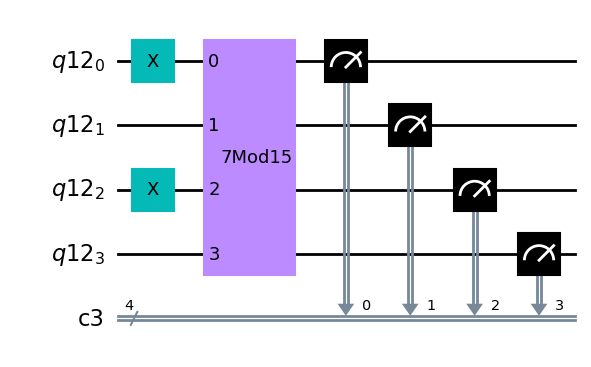

In [11]:
# Circuit for input state |5>

qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.x(qreg[0])
circ.x(qreg[2])
circ.append(U, qreg[:])
circ.measure(qreg[:], creg[:])
circ.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


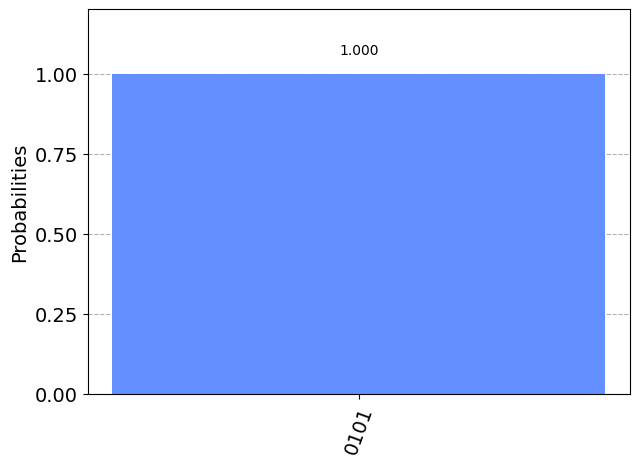

In [12]:
job = execute(circ, backend=sim, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

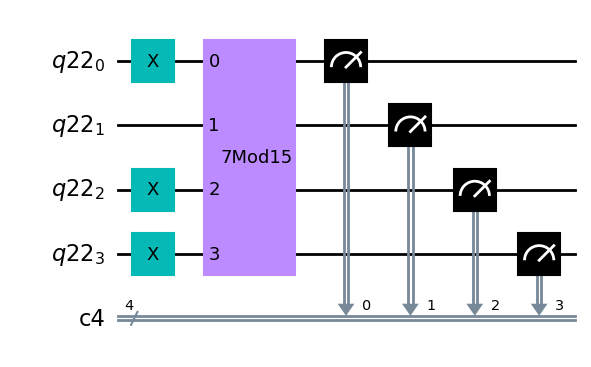

In [13]:
# Circuit for input state |13>

qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.x(qreg[0])
circ.x(qreg[2])
circ.x(qreg[3])
circ.append(U, qreg[:])
circ.measure(qreg[:], creg[:])
circ.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


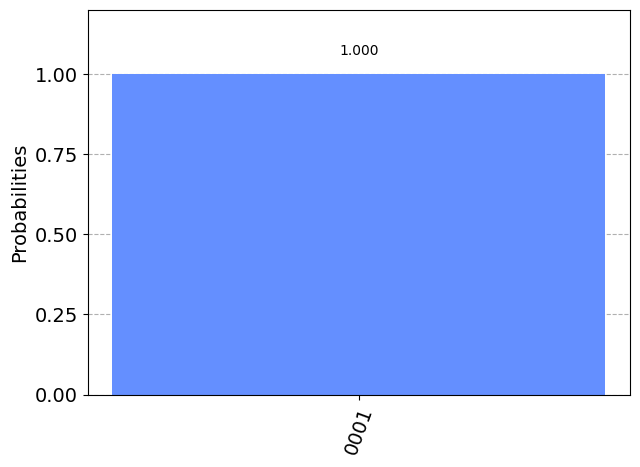

In [14]:
job = execute(circ, backend=sim, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Step B

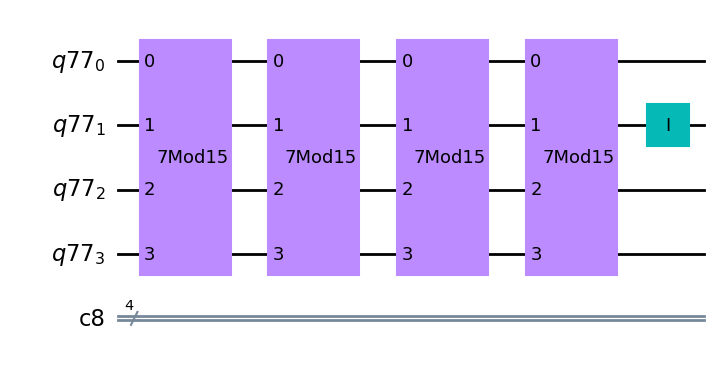

In [27]:
qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.draw('mpl')

In [25]:
job = execute(circ, backend = Aer.get_backend('unitary_simulator'))
result = job.result()
matrix = result.get_unitary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


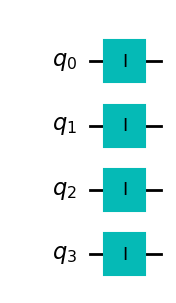

In [28]:
circ2 = QuantumCircuit(m)
circ2.i(range(m))
circ2.draw('mpl')

In [29]:
job = execute(circ2, backend = Aer.get_backend('unitary_simulator'))
result = job.result()
matrix2 = result.get_unitary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [30]:
if matrix == matrix2:
    print('U^(2^2) = I')
else:
    print('Not equal')

U^(2^2) = I


Step C

In [31]:
def cU_multi(k):
    circ = QuantumCircuit(m)
    for _ in range(2**k):
        circ.append(U, range(m))
    
    U_multi = circ.to_gate()
    U_multi.name = '7Mod15_[2^{}]'.format(k)
    
    cU_multi = U_multi.control()
    return cU_multi

In [32]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

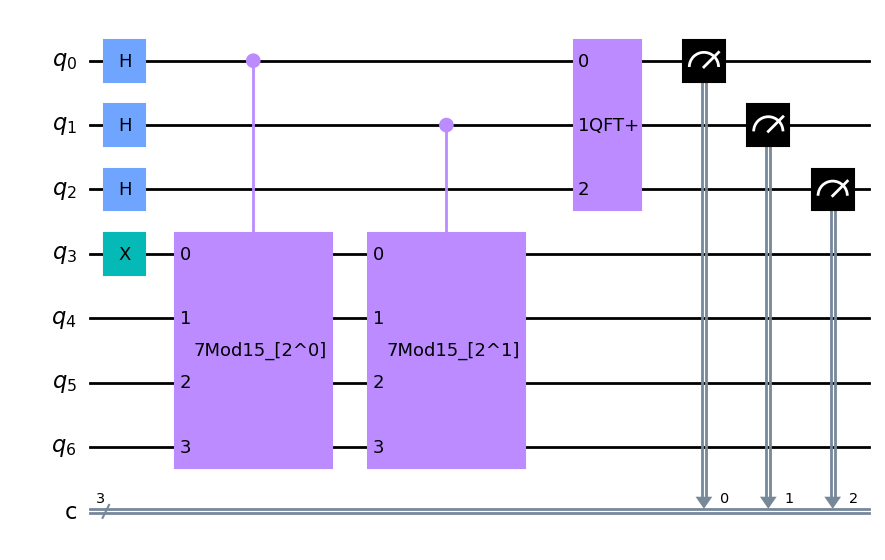

In [34]:
# QPE circuit for Shor
t = 3 
shor_QPE = QuantumCircuit(t+m, t)
shor_QPE.h(range(t))

shor_QPE.x(t)
for idx in range(t-1):
    shor_QPE.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_QPE.append(qft_dag, range(t))
shor_QPE.measure(range(t), range(t))

shor_QPE.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


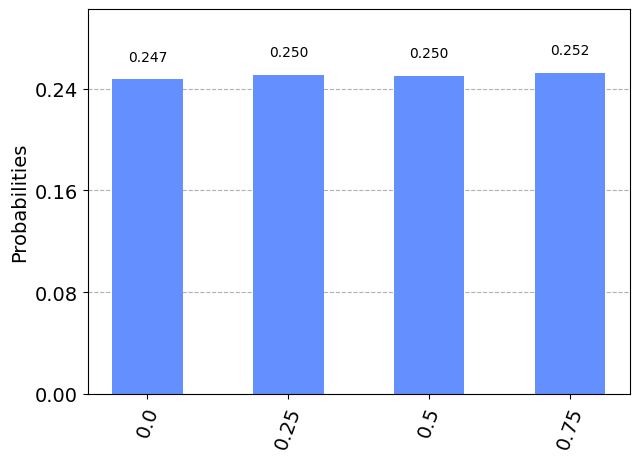

In [35]:
shor_QPE_trans = transpile(shor_QPE, sim)
count_QPE = sim.run(shor_QPE_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**3) for key in count_QPE.keys()]
count_new_QPE = dict(zip(key_new, count_QPE.values()))
plot_histogram(count_new_QPE)

## Part 2

Shor_Orig

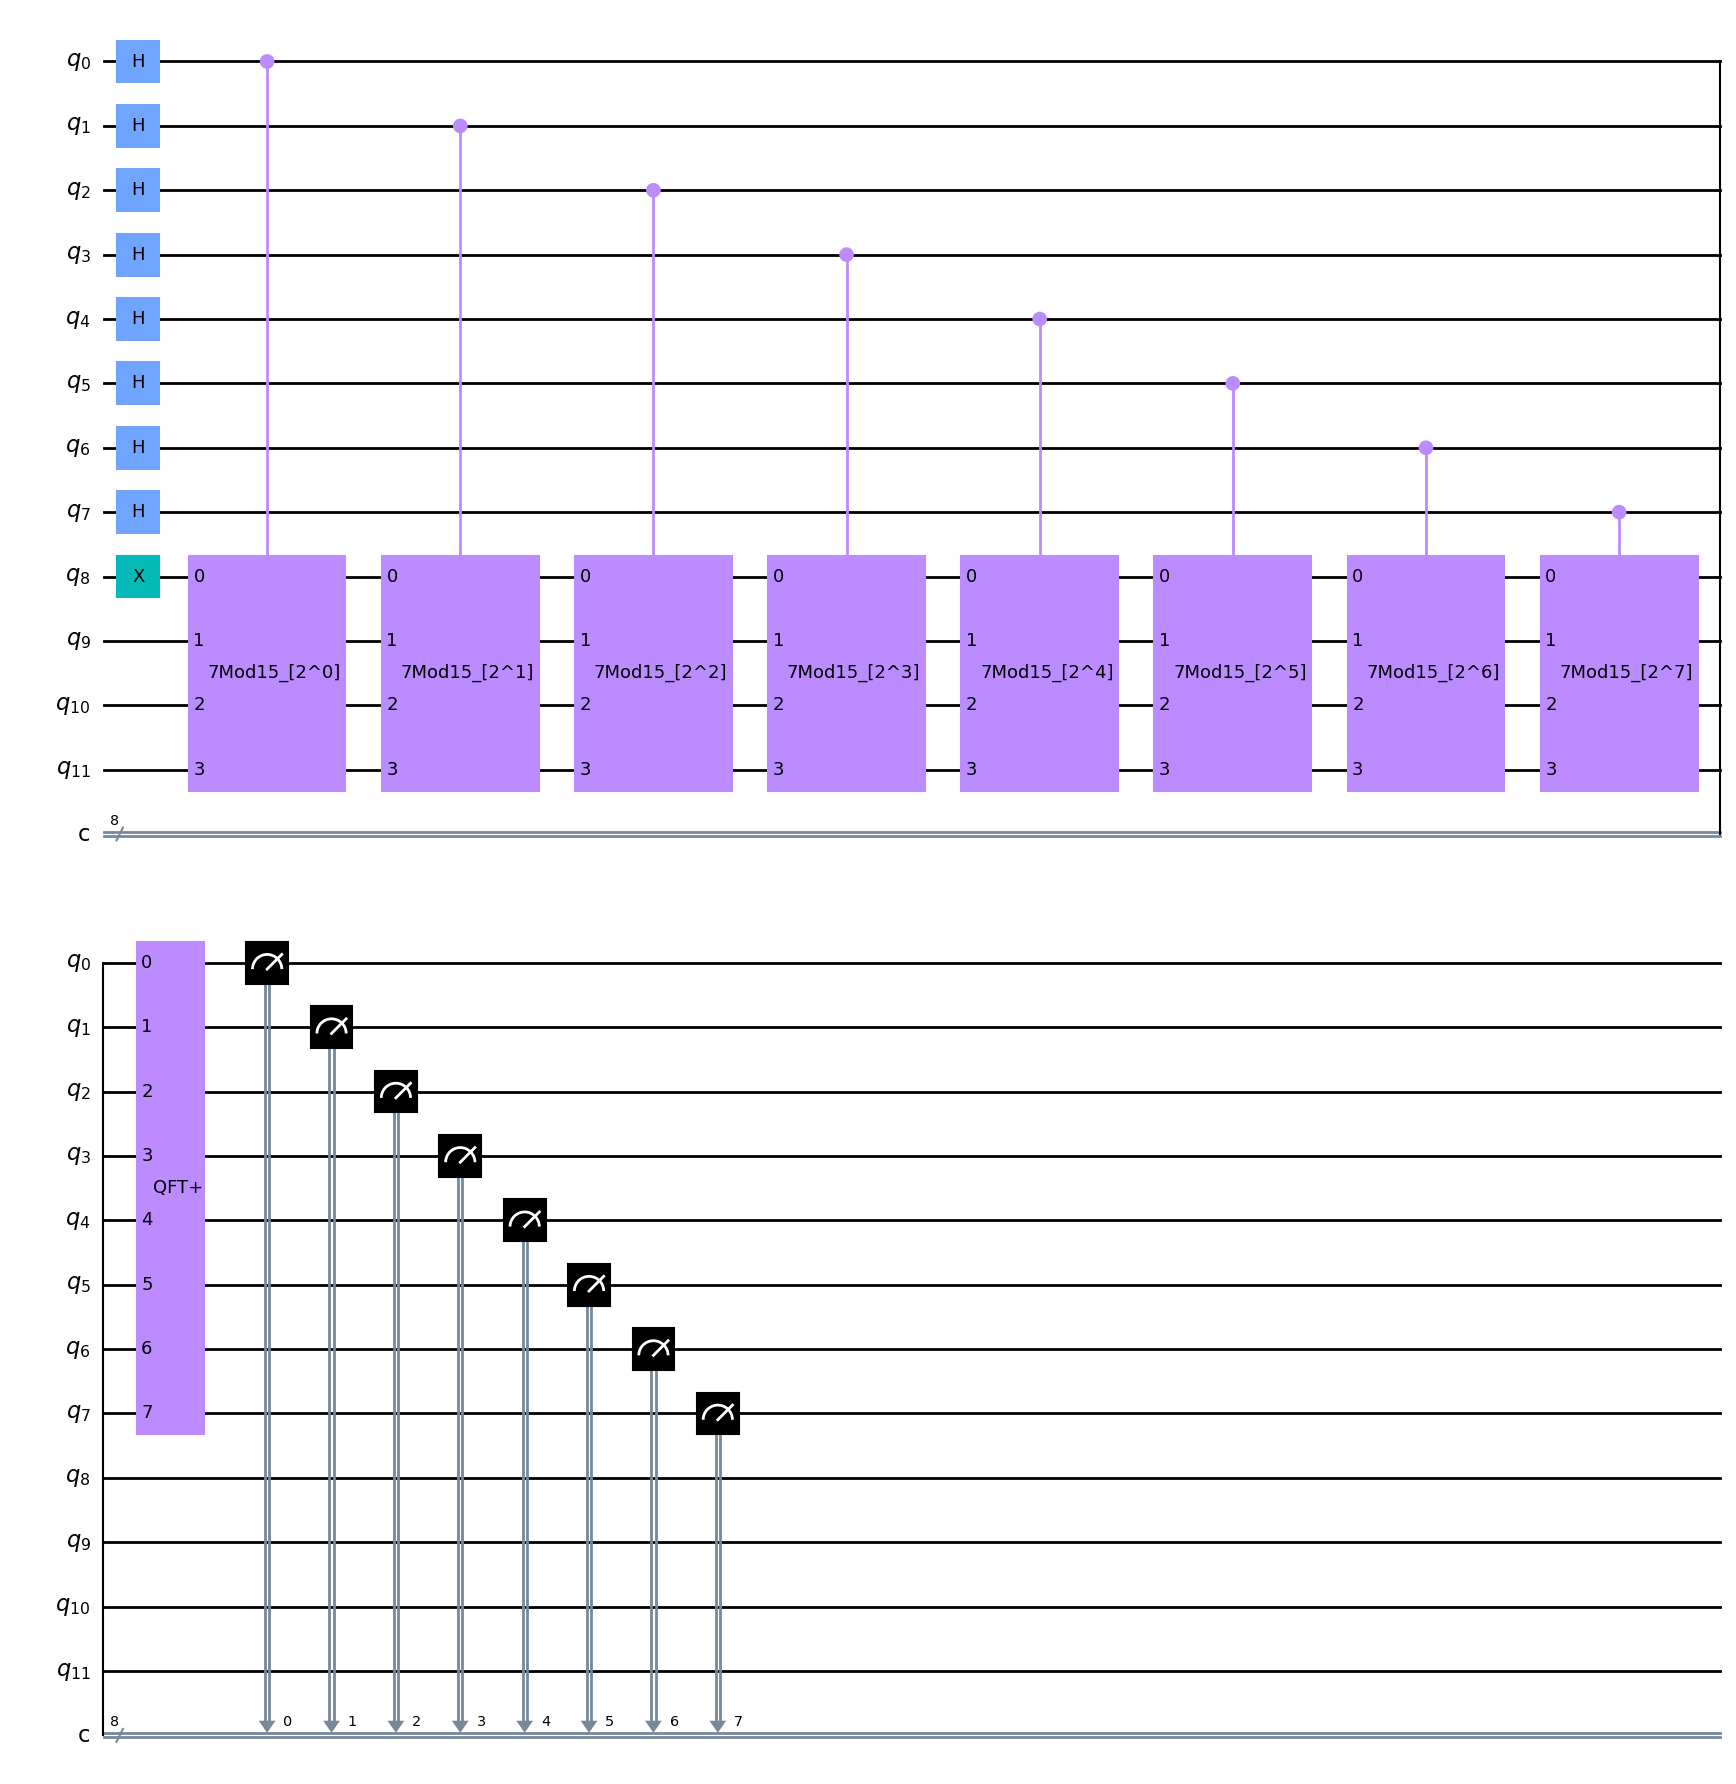

In [36]:
t = 2*m

shor_Orig = QuantumCircuit(t+m, t)
shor_Orig.h(range(t))

shor_Orig.x(t)
for idx in range(t):
    shor_Orig.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_Orig.append(qft_dag, range(t))
shor_Orig.measure(range(t), range(t))
    
shor_Orig.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


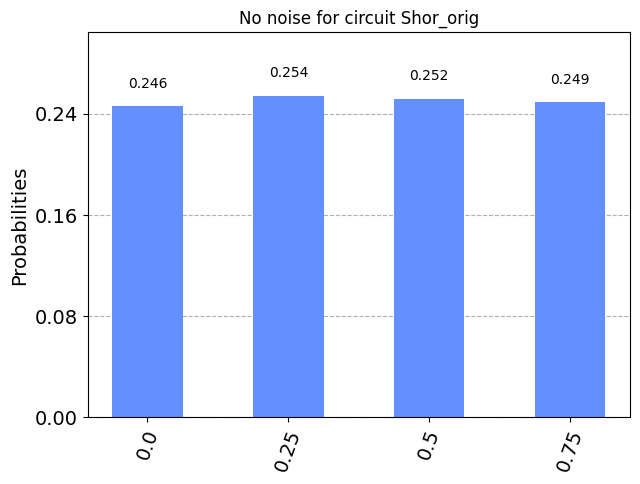

In [39]:
shor_Orig_trans = transpile(shor_Orig, sim)
count_Orig = sim.run(shor_Orig_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**t) for key in count_Orig.keys()]
count_new_Orig = dict(zip(key_new, count_Orig.values()))

plot_histogram(count_new_Orig, title='No noise for circuit Shor_orig')

In [38]:
from qiskit.test.mock import FakeMelbourne
from qiskit.providers.aer import AerSimulator

backend = FakeMelbourne()
sim_Melborne = AerSimulator.from_backend(backend)

shots=8192

/var/folders/xj/wtbfz_tn2nj_2xrlbsst05j80000gn/T/ipykernel_80233/4069782592.py:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeMelbourne


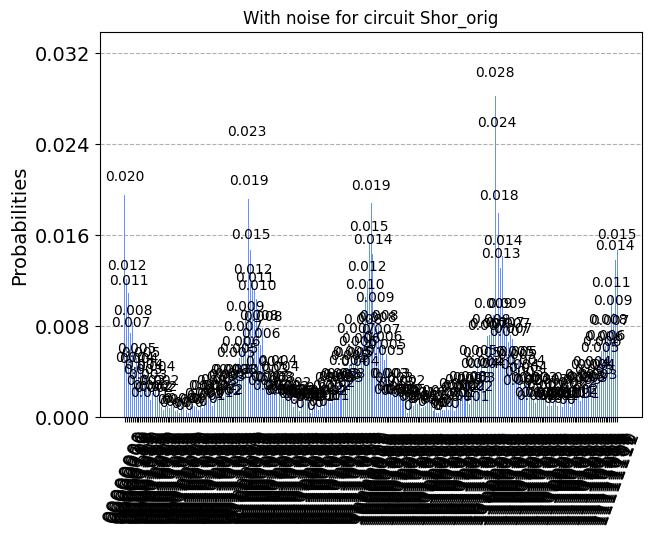

In [41]:
shorOrig_trans = transpile(shor_Orig, backend, optimization_level=3)

count_shorOrig_noise = sim_Melborne.run(shor_Orig_trans, shots=shots).result().get_counts()

plot_histogram(count_shorOrig_noise, title='With noise for circuit Shor_orig')

In [43]:
key_new = [str(np.round(int(key,2)/2**t,3)) for key in count_shorOrig_noise.keys()]
count_new_Orig_noise = dict(zip(key_new, count_shorOrig_noise.values()))

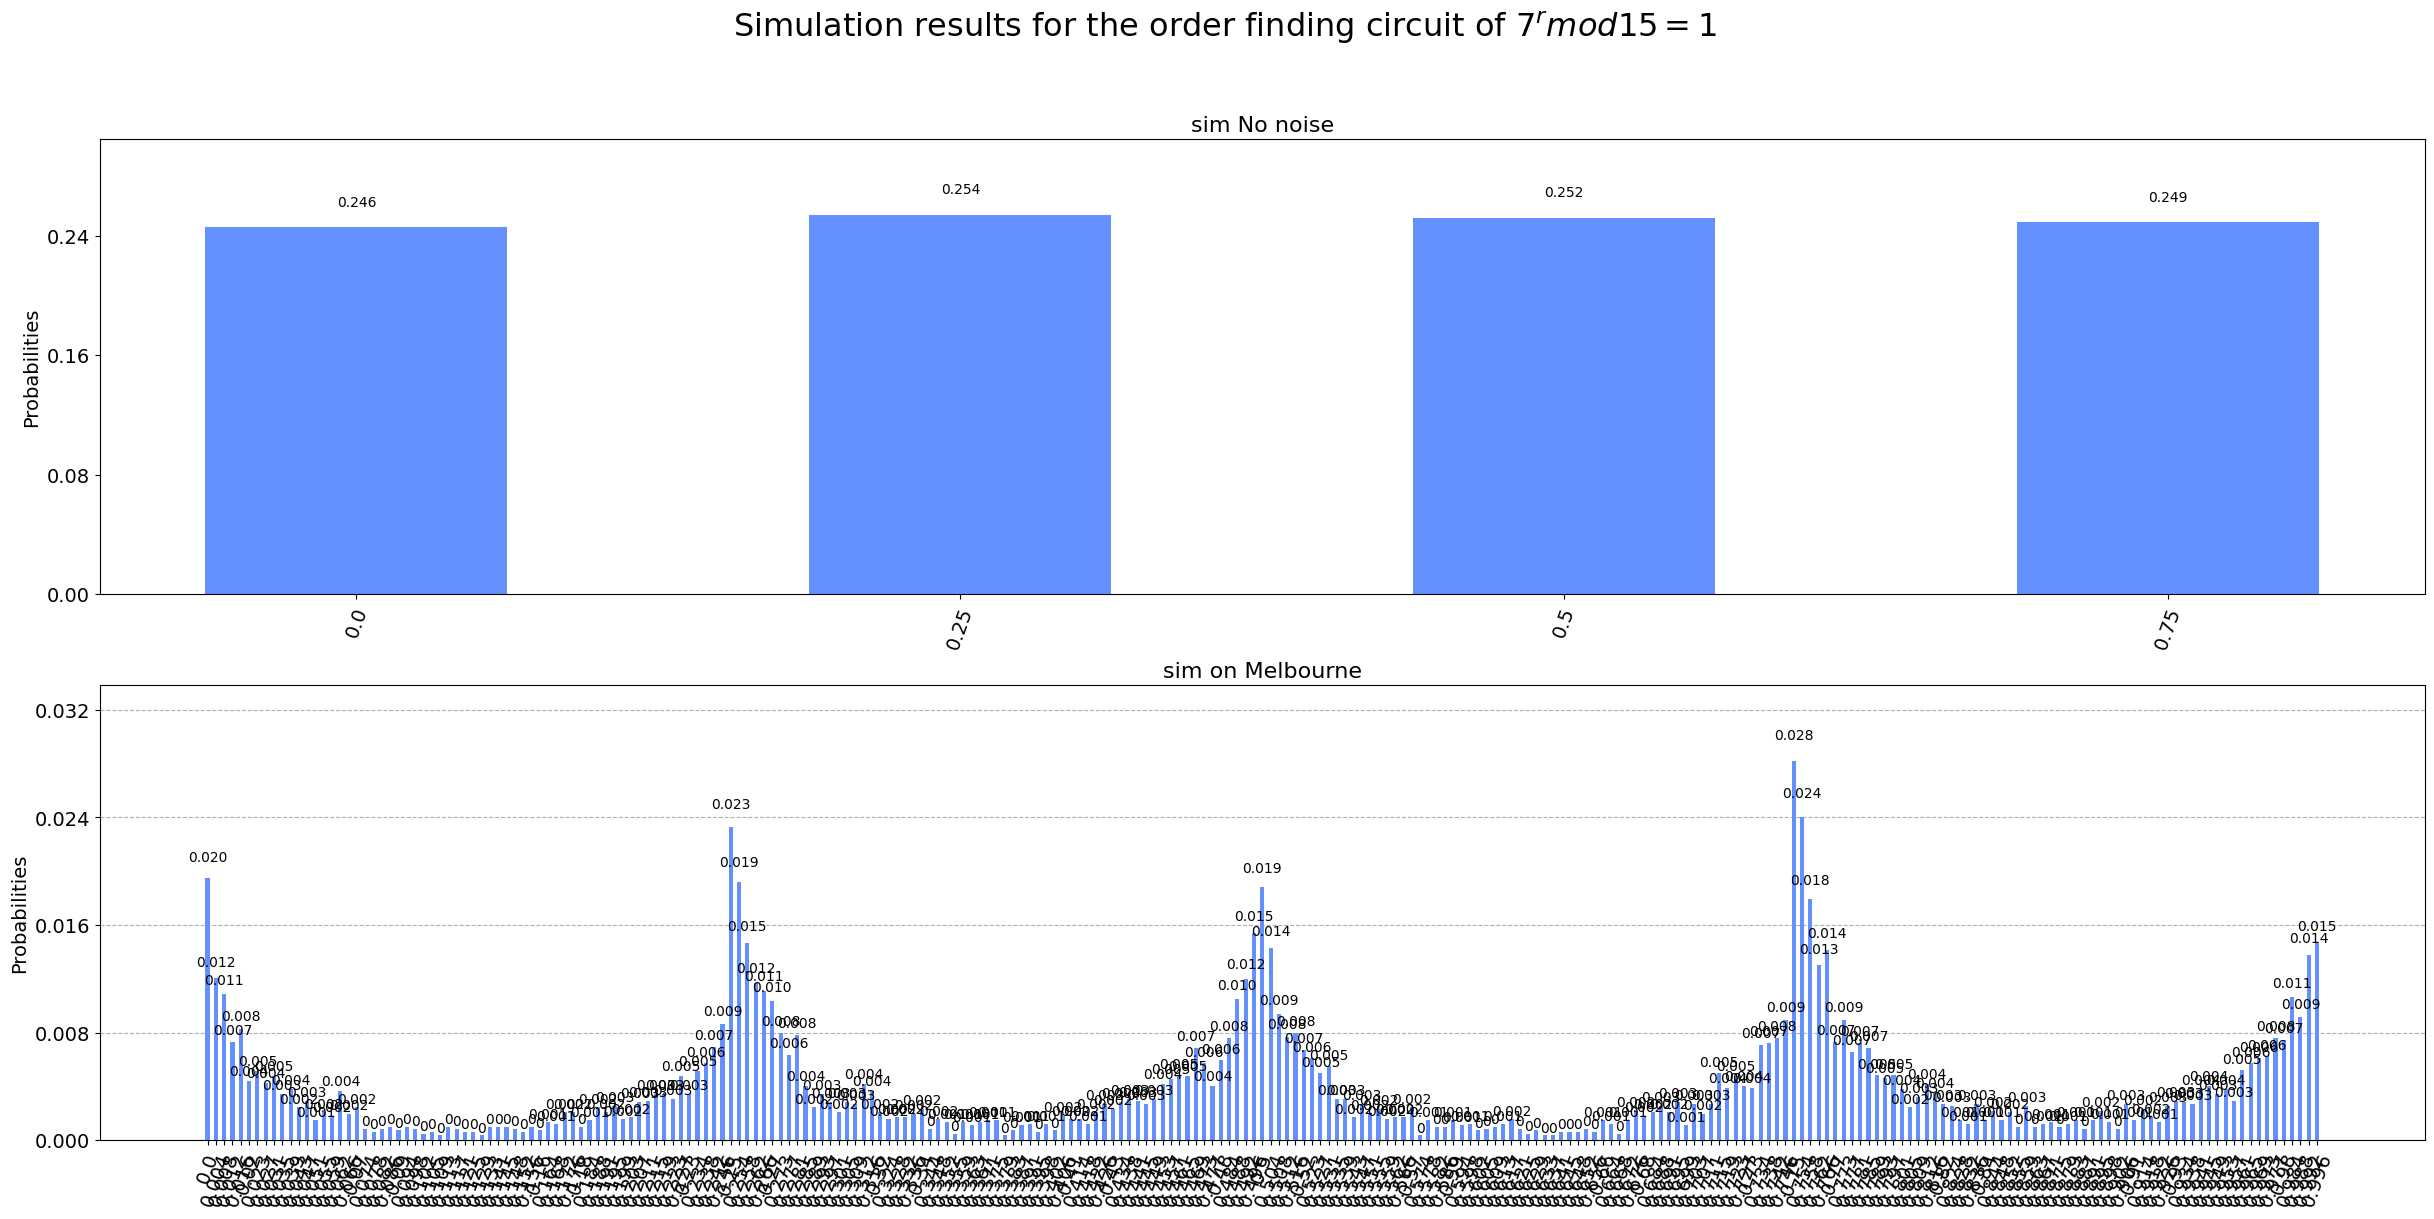

In [44]:
fig, ax = plt.subplots(2,1, figsize=(30,13))
fig.suptitle('Simulation results for the order finding circuit of $7^{r} mod 15 = 1$', fontsize=23)
plot_histogram(count_new_Orig, ax=ax[0])
plot_histogram(count_new_Orig_noise, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim on Melbourne', fontsize=16)
plt.show()

Shor_QPE

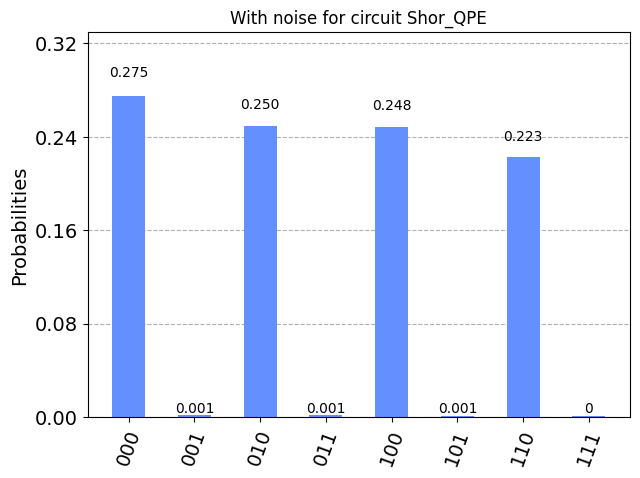

In [45]:
shorQPE_trans = transpile(shor_QPE, backend, optimization_level=3)

count_shorQPE_noise = sim_Melborne.run(shor_QPE_trans, shots=shots).result().get_counts()

plot_histogram(count_shorQPE_noise, title='With noise for circuit Shor_QPE')

In [46]:
key_new = [str(np.round(int(key,2)/2**t,3)) for key in count_shorQPE_noise.keys()]
count_new_QPE_noise = dict(zip(key_new, count_shorQPE_noise.values()))

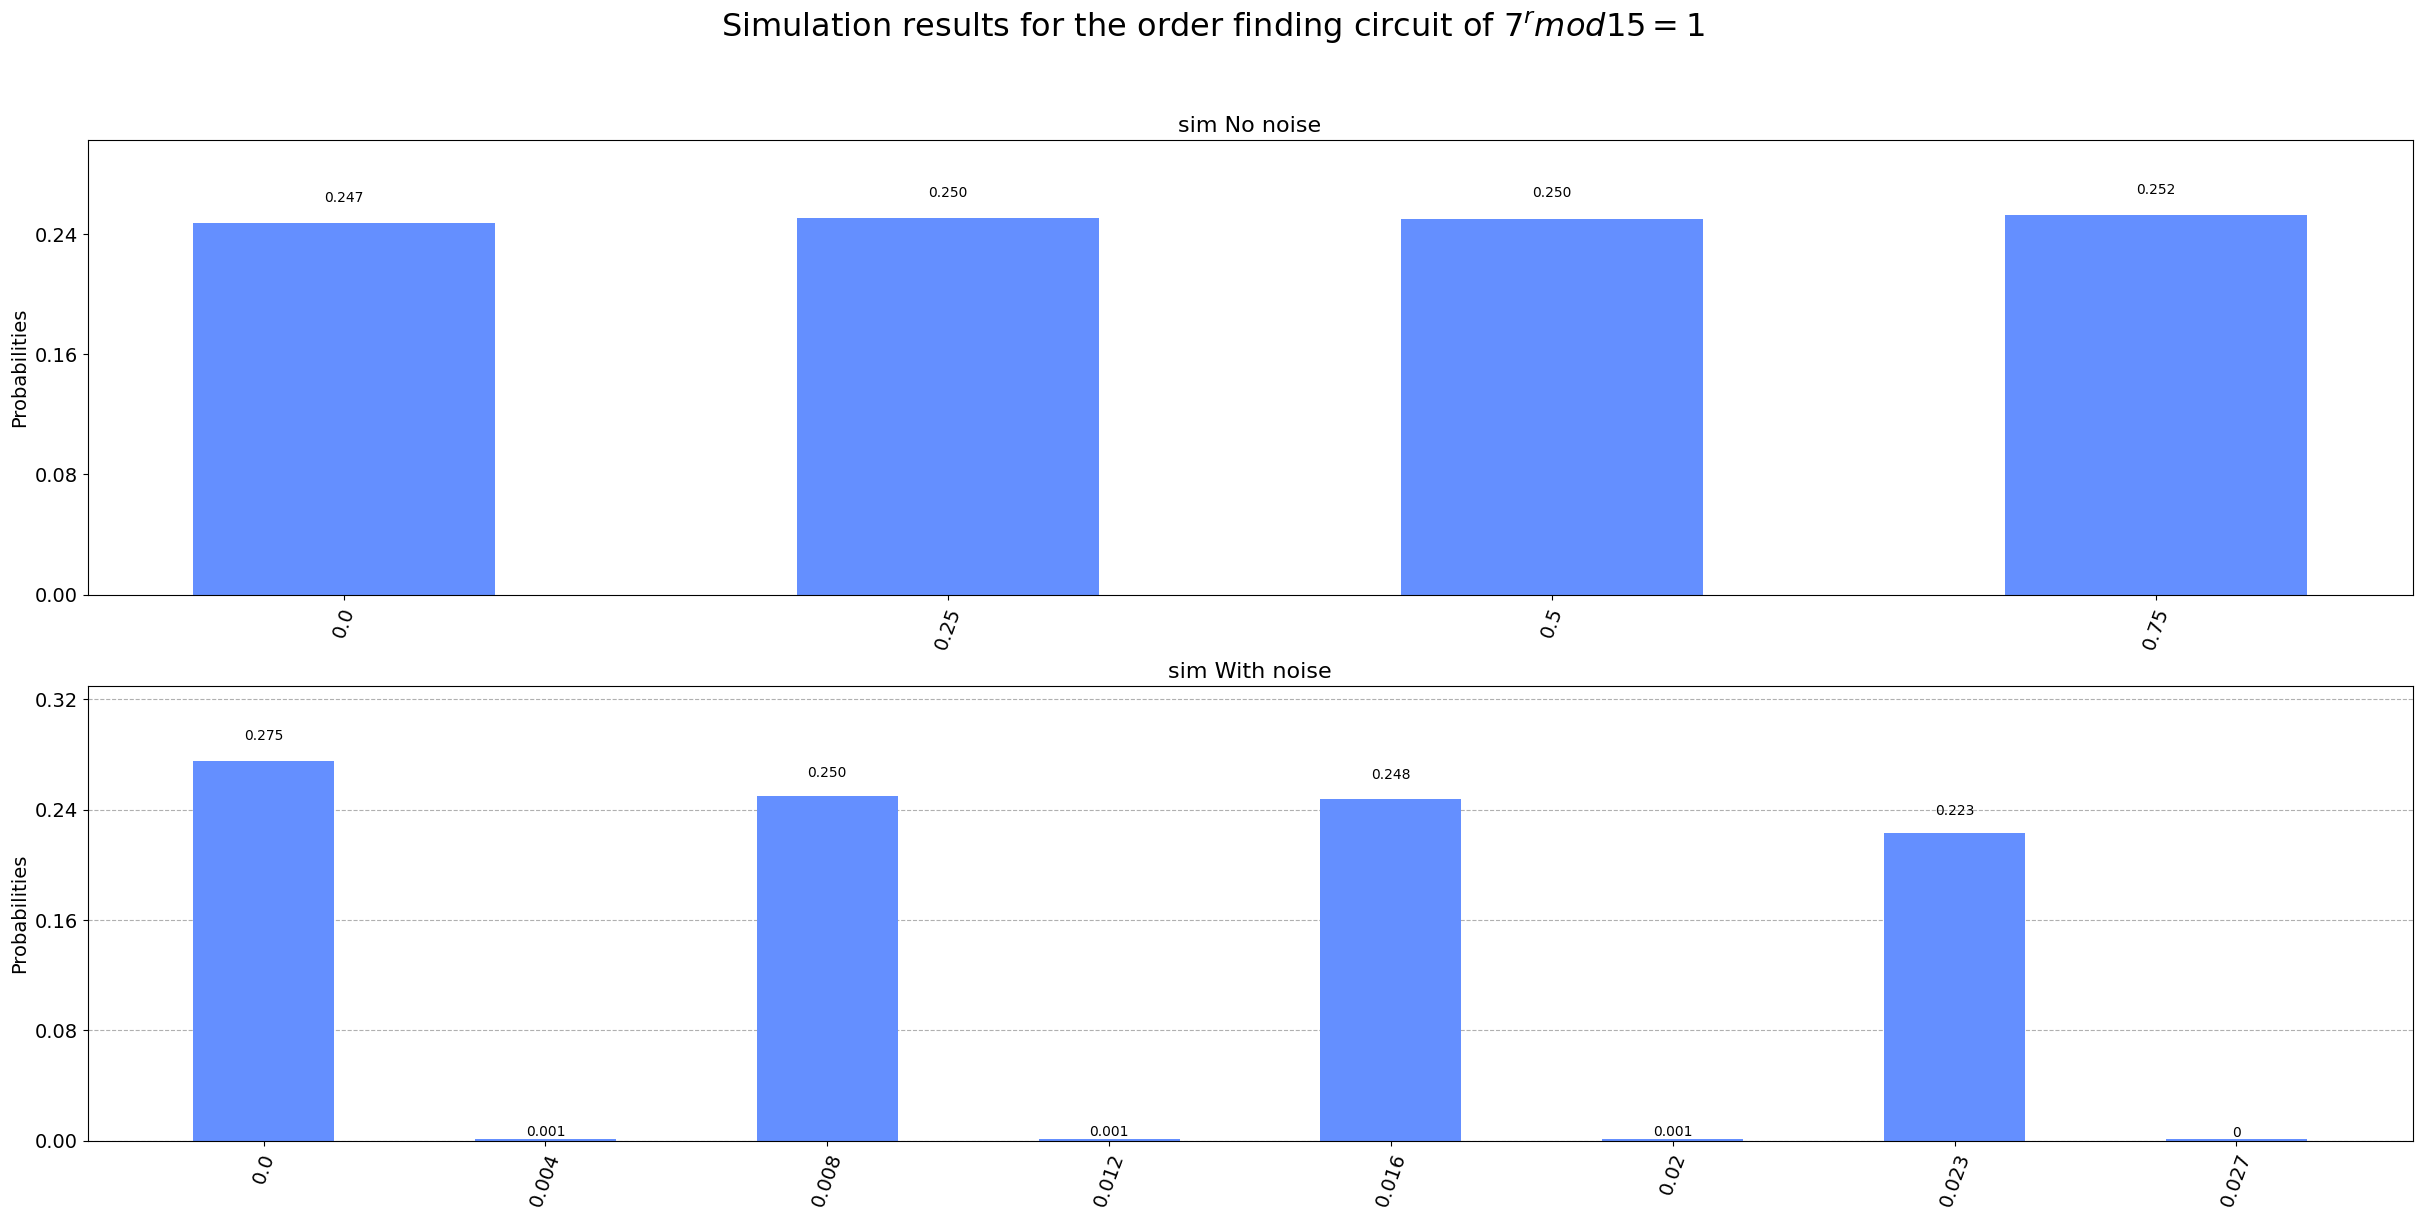

In [48]:
fig, ax = plt.subplots(2,1, figsize=(30,13))
fig.suptitle('Simulation results for the order finding circuit of $7^{r} mod 15 = 1$', fontsize=23)
plot_histogram(count_new_QPE, ax=ax[0])
plot_histogram(count_new_QPE_noise, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim With noise', fontsize=16)
plt.show()

## Additional Task

In [3]:
N=63
m= int(np.ceil(np.log2(N)))
a = 31

circ = QuantumCircuit(m)
circ.x(range(m))
circ.swap(1, 2)
circ.swap(2, 3)
circ.swap(3, 4)
circ.swap(4, 5)
circ.swap(0, 5)

U = circ.to_gate()
U.name ='{}Mod{}'.format(31, N)

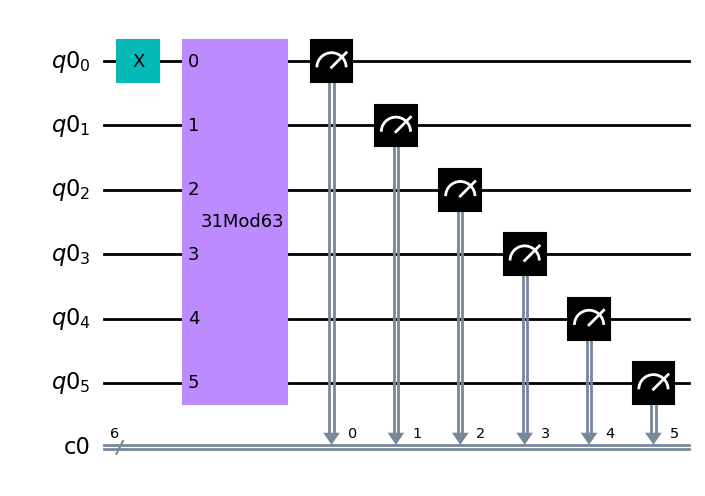

In [4]:
qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.x(qreg[0])
circ.append(U, qreg[:])
circ.measure(qreg[:], creg[:])
circ.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


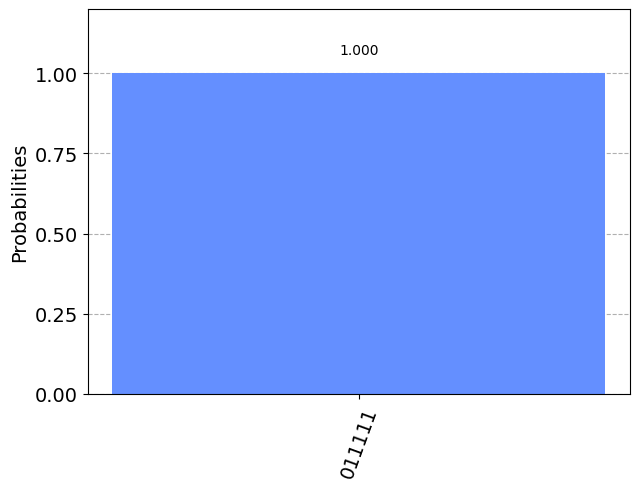

In [5]:
job = execute(circ, backend=sim, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

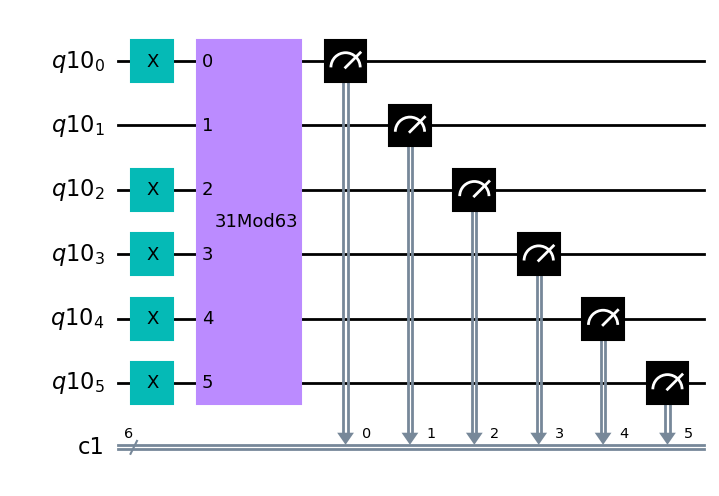

In [6]:
qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.x(qreg[0])
circ.x(qreg[2])
circ.x(qreg[3])
circ.x(qreg[4])
circ.x(qreg[5])
circ.append(U, qreg[:])
circ.measure(qreg[:], creg[:])
circ.draw('mpl')

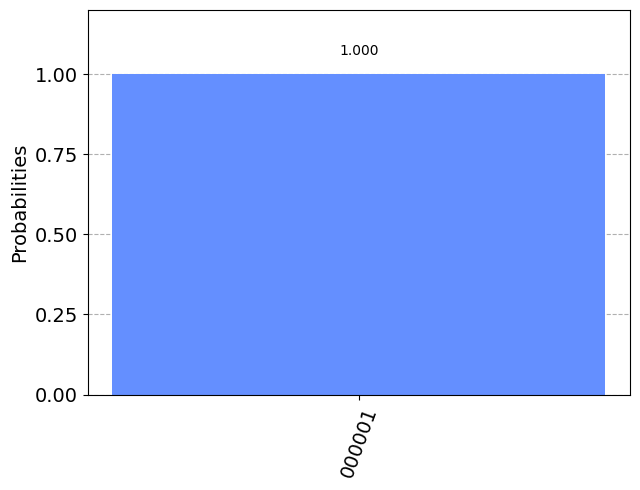

In [7]:
job = execute(circ, backend=sim, shots=shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Step 2

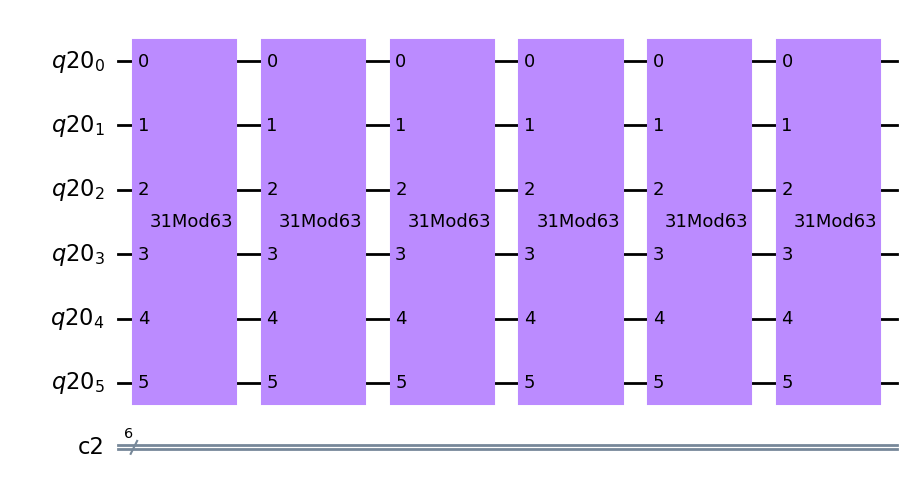

In [8]:
qreg = QuantumRegister(m)
creg = ClassicalRegister(m)
circ = QuantumCircuit(qreg, creg)
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.append(U, qreg[:])
circ.draw('mpl')

In [9]:
job = execute(circ, backend = Aer.get_backend('unitary_simulator'))
result = job.result()
matrix = result.get_unitary()

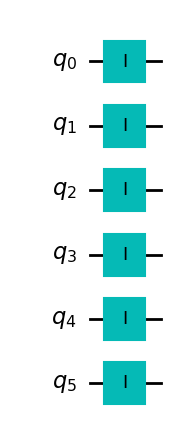

In [10]:
circ2 = QuantumCircuit(m)
circ2.i(range(m))
circ2.draw('mpl')

In [11]:
job = execute(circ2, backend = Aer.get_backend('unitary_simulator'))
result = job.result()
matrix2 = result.get_unitary()

In [12]:
if matrix == matrix2:
    print('U^(6) = I')
else:
    print('Not equal')

U^(6) = I


PART 2

In [13]:
def cU_multi(k):
    circ = QuantumCircuit(m)
    for _ in range(2**k):
        circ.append(U, range(m))
    
    U_multi = circ.to_gate()
    U_multi.name = '31Mod63_[2^{}]'.format(k)
    
    cU_multi = U_multi.control()
    return cU_multi

In [14]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

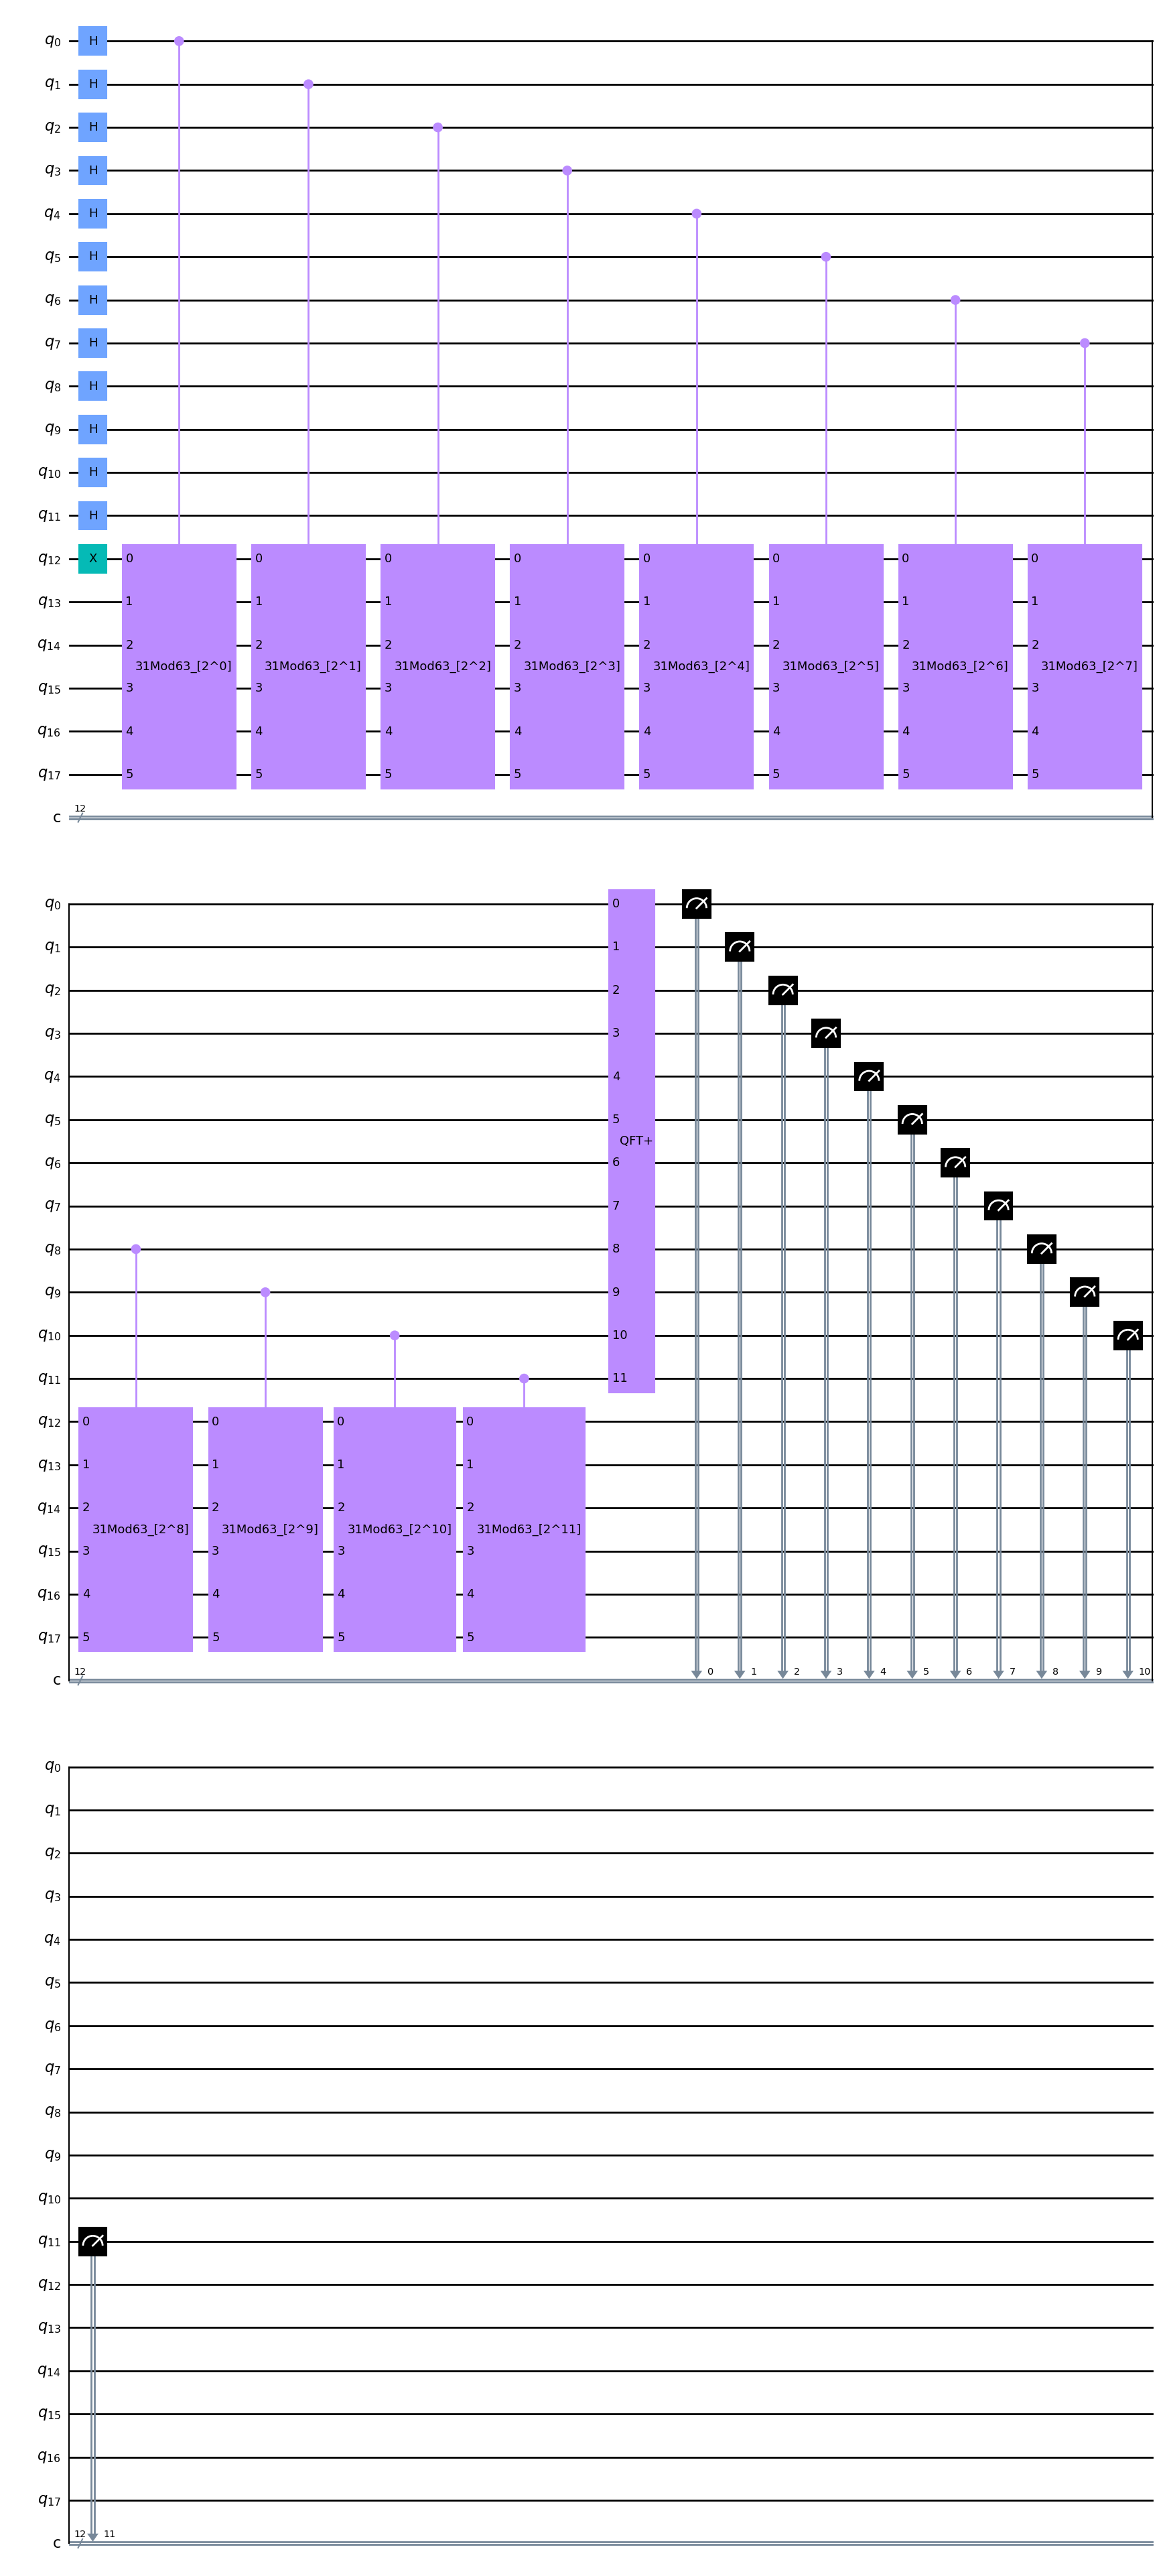

In [15]:
t = 2*m

shor_Orig = QuantumCircuit(t+m, t)
shor_Orig.h(range(t))

shor_Orig.x(t)
for idx in range(t):
    shor_Orig.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_Orig.append(qft_dag, range(t))
shor_Orig.measure(range(t), range(t))
    
shor_Orig.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


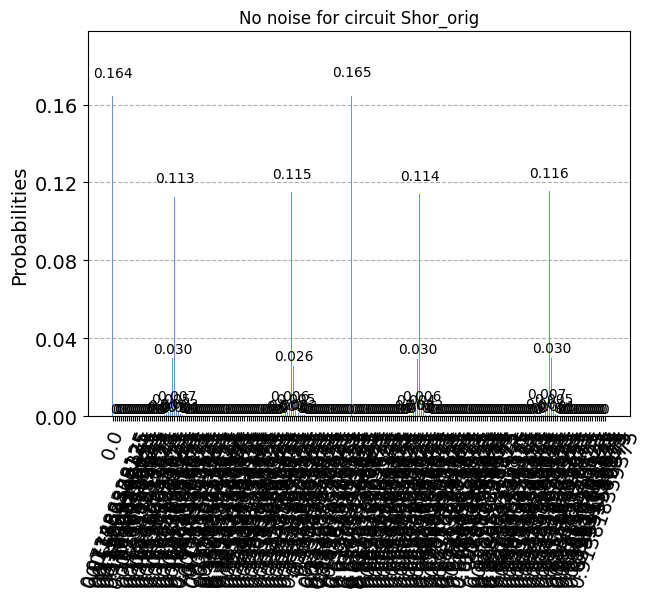

In [20]:
shor_Orig_trans = transpile(shor_Orig, sim)
count_Orig = sim.run(shor_Orig_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**t) for key in count_Orig.keys()]
count_new_Orig = dict(zip(key_new, count_Orig.values()))

plot_histogram(count_new_Orig, title='No noise for circuit Shor_orig')

In [18]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import AerSimulator

provider = IBMQ.load_account()

shorOrig_trans = transpile(shor_Orig, sim, optimization_level=3)
noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_lima'))
result = execute(shorOrig_trans, sim, noise_model=noise_model,shots=10000).result().get_counts()



ibmqfactory.load_account:WARNING:2022-11-21 10:46:31,882: Credentials are already in use. The existing account in the session will be replaced.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


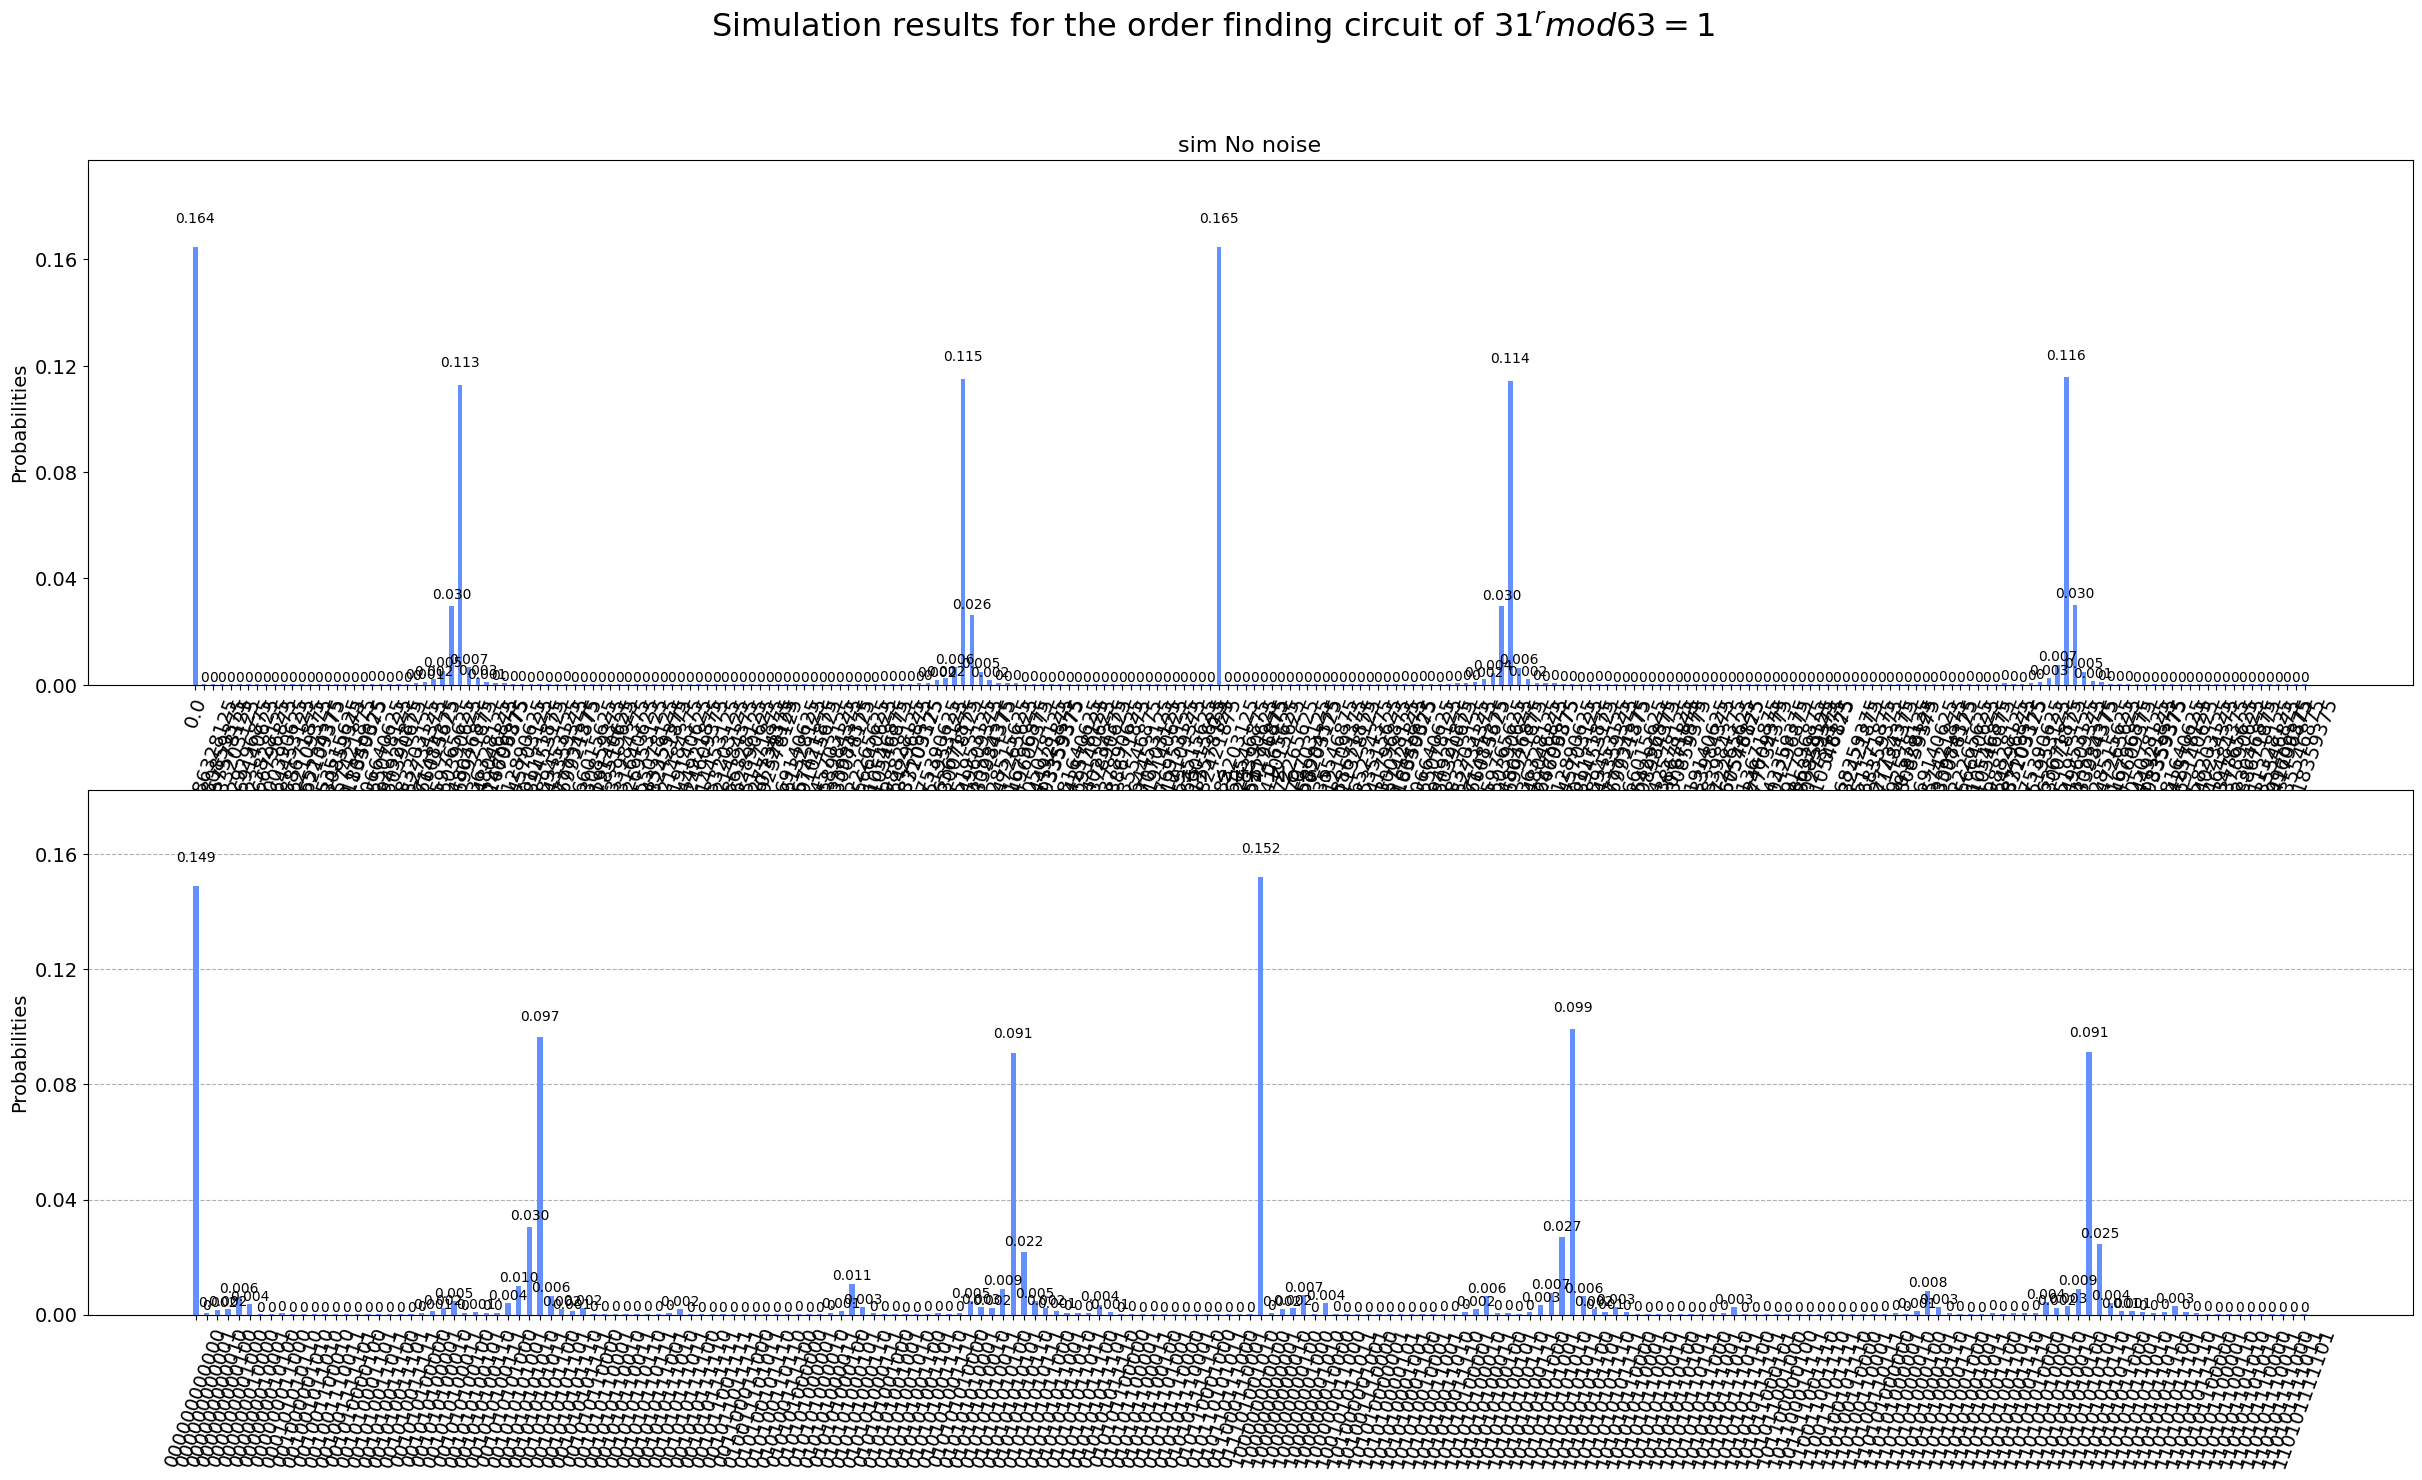

In [24]:
fig, ax = plt.subplots(2,1, figsize=(30,15))
fig.suptitle('Simulation results for the order finding circuit of $31^{r} mod 63 = 1$', fontsize=23)
plot_histogram(count_new_Orig, ax=ax[0])
plot_histogram(result, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim with Noise', fontsize=16)
plt.show()
